### Assignment 2 - Linear Regression

In [1]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The dataset is based on Gyódi and Nawaro (2021)’s research on Airbnb prices in European cities. We take a sub dataset of Airbnb listings in Barcelona, Spain during weekdays and intend to build a model to predict listing price using the features.<br>

The variables are as follows.<br>
<b>price</b> ---	Listing price<br>
<b>bedrooms</b> ---	number of bedrooms<br>
<b>person_capacity</b> ---	maximum number of guests<br>
<b>room_private</b> ---	dummy for private rooms<br>
<b>room_shared</b> ---	dummy for shared rooms<br>
<b>cleanliness</b> ---	guest reviews: scale to 10<br>
<b>guest_satisfaction</b> --- guest reviews:scale to 100<br>
<b>superhost</b> ---	dummy for hosts with the superhost status<br>
<b>multi</b> ---	dummy for listings offered by hosts with 2–4 listings<br>
<b>biz</b> ---	dummy for listings offered by hosts with more than 4 listings<br>
<b>dist</b> ---	distance to the city centre in kilometres<br>
<b>metro_dist</b> ---	distance to the closest metro station in kilometres<br>
<b>attr_index</b> ---	attraction index: scale to 100, measuring the accessibility to attractions<br>
<b>rest_index</b> ---	restaurant index: scale to 100, measuring the accessibility to restaurants<br>
<b>lng</b> ---	Longitude of the listing location<br>
<b>lat</b> ---	Latitude of the listing location<br>

Ref:<br> 
Gyódi, K. and L. Nawaro (2021). Determinants of Airbnb prices in European cities: A spatial econometrics approach. Tourism Management, Vol. 86.

1. Import the necessary packages.

In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


2. Read in the dataset, 'Barcelona.csv'. Display the data.

In [3]:
Barcelona_airbnb = pd.read_csv('Barcelona.csv')
Barcelona_airbnb.head()

,price,bedrooms,room_shared,room_private,person_capacity,superhost,multi,biz,cleanliness,guest_satisfaction,dist,metro_dist,attr_index,rest_index,lng,lat
0,474.317499,1,False,False,4,False,0,1,10,91,1.111996,0.630491,17.942927,20.154890,2.17556,41.39624
1,169.897829,1,False,True,2,True,1,0,10,88,1.751839,0.124017,10.910462,17.484489,2.14906,41.38714
2,161.984779,1,False,True,4,False,0,1,9,88,1.670493,0.080322,11.726595,18.505814,2.15357,41.37859
3,367.956804,1,False,False,3,False,0,1,10,91,1.475847,0.093107,13.634603,20.837357,2.16839,41.37390
4,196.895292,1,False,True,3,False,1,0,9,91,1.855452,0.272486,11.793678,17.440874,2.15238,41.37699


3. How many observations? Display the variable names.

In [4]:
Barcelona_airbnb.shape


(1555, 16)

There are 1555 observations

In [5]:
#variable names
Barcelona_airbnb.columns

Index(['price', 'bedrooms', 'room_shared', 'room_private', 'person_capacity',
       'superhost', 'multi', 'biz', 'cleanliness', 'guest_satisfaction',
       'dist', 'metro_dist', 'attr_index', 'rest_index', 'lng', 'lat'],
      dtype='object')

4.1 Explore the variable 'price'. First, Let's find out the statistics using describe(). Then we use a graph to explore the distribution. What do you find?

In [6]:
Barcelona_airbnb['price'].describe()

count    1555.000000
mean      288.391667
std       321.180435
min        69.588289
25%       161.984779
50%       208.532129
75%       335.373659
max      6943.700980
Name: price, dtype: float64

(array([1.5e+03, 4.9e+01, 3.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 1.0e+00,
        0.0e+00, 0.0e+00, 2.0e+00]),
 array([  69.58828869,  756.99955782, 1444.41082695, 2131.82209608,
        2819.23336521, 3506.64463434, 4194.05590348, 4881.46717261,
        5568.87844174, 6256.28971087, 6943.70098   ]),
 <BarContainer object of 10 artists>)

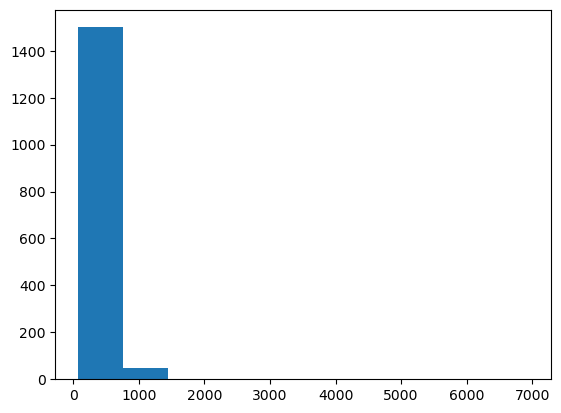

In [7]:
#we can specify the bins
plt.hist(Barcelona_airbnb['price'])
#range(begnining,endinf,step)

The histogram displays a positively skewed distribution of prices, indicating a departure from normality. As part of data preprocessing, we will identify and exclude outliers to better align with the assumptions of normality in subsequent analyses.




4.2 We decide to remove the price outliers (defined as three standard deviation away from the mean) and repeat the graph. What do you find?

In [8]:
Barcelona_airbnb['price'].quantile(0.99)

983.6525705820001

In [9]:
Barcelona_airbnb['price'].quantile(0.9999)

6943.70098

In [10]:
Barcelona_airbnb['price'].mean()

288.39166706715116

In [11]:
Barcelona_airbnb['price'].std()

321.1804352615852

In [12]:
outlier_rm=Barcelona_airbnb['price'].mean()+3* Barcelona_airbnb['price'].std()

In [13]:
outlier_rm

1251.932972851907

In [14]:
bc_normal_price =Barcelona_airbnb[Barcelona_airbnb['price']<1251]

In [15]:
bc_normal_price


,price,bedrooms,room_shared,room_private,person_capacity,superhost,multi,biz,cleanliness,guest_satisfaction,dist,metro_dist,attr_index,rest_index,lng,lat
0,474.317499,1,False,False,4,False,0,1,10,91,1.111996,0.630491,17.942927,20.154890,2.17556,41.39624
1,169.897829,1,False,True,2,True,1,0,10,88,1.751839,0.124017,10.910462,17.484489,2.14906,41.38714
2,161.984779,1,False,True,4,False,0,1,9,88,1.670493,0.080322,11.726595,18.505814,2.15357,41.37859
3,367.956804,1,False,False,3,False,0,1,10,91,1.475847,0.093107,13.634603,20.837357,2.16839,41.37390
4,196.895292,1,False,True,3,False,1,0,9,91,1.855452,0.272486,11.793678,17.440874,2.15238,41.37699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,300.928620,1,False,True,2,False,0,0,10,100,2.394839,0.954952,9.709902,12.430326,2.19590,41.39637
1550,769.660437,3,False,False,6,False,0,1,8,84,2.503374,0.554007,9.075307,14.946029,2.19991,41.38834
1551,318.151139,1,False,True,2,True,1,0,9,98,2.619616,0.761843,8.747713,12.276081,2.20066,41.39204
1552,248.562851,1,False,True,2,True,1,0,10,98,2.700091,0.866258,8.538490,11.868058,2.20140,41.39286


In [16]:
bc_normal_price['price'].describe()

count    1548.000000
mean      273.792988
std       174.774851
min        69.588289
25%       161.984779
50%       208.532129
75%       330.078898
max      1094.793679
Name: price, dtype: float64

In [17]:
bc_normal_price.shape

(1548, 16)

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='price', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Prices for barcelona airbnb')

Text(0.5, 0, 'Price (Euros)')

Text(0, 0.5, 'Frequency')

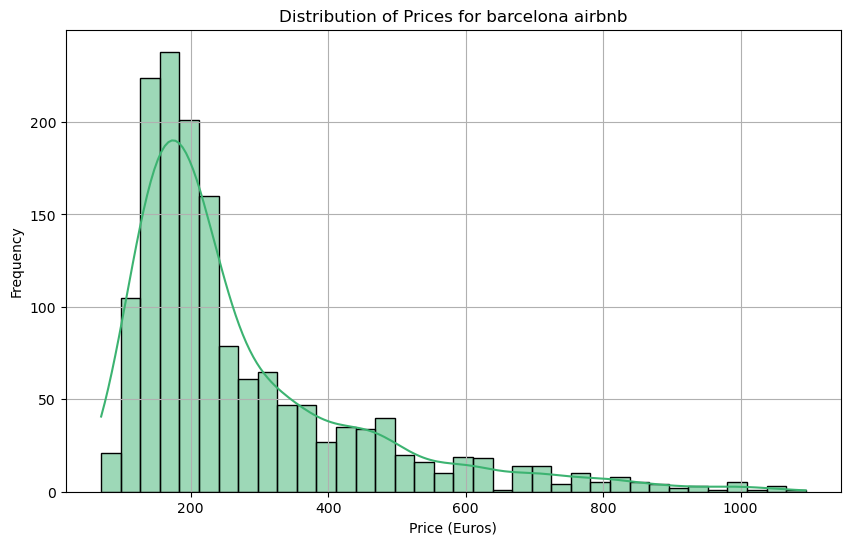

In [18]:
plt.figure(figsize=(10, 6))
#custom_colors = ['lightgreen', 'mediumseagreen', 'green', 'darkgreen']
#plt.hist(toyato_cars['Price'], bins=20, color='mediumseagreen', edgecolor='black')
#sn.histplot(data=toyato_cars, x="Price")
sn.histplot(data=bc_normal_price, x="price", color='mediumseagreen',kde=True)

plt.title('Distribution of Prices for barcelona airbnb')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.grid(True)

#Bins: 20
#Interpretation: The data range is divided into 20 intervals.
#Visual Effect: The resulting histogram will have 20 bars.

Following the removal of outliers, the data still exhibits a positively skewed distribution; however, it now conforms more closely to a normal distribution compared to the initial dataset.







5. How many superhosts are there? Create a graph to display as well.

In [19]:
superhost_counts = bc_normal_price['superhost'].value_counts()
superhost_counts

superhost
False    1269
True      279
Name: count, dtype: int64

<Axes: xlabel='superhost'>

Text(0.5, 1.0, 'Number of Superhosts')

Text(0.5, 0, 'Superhost Status')

Text(0, 0.5, 'Count')

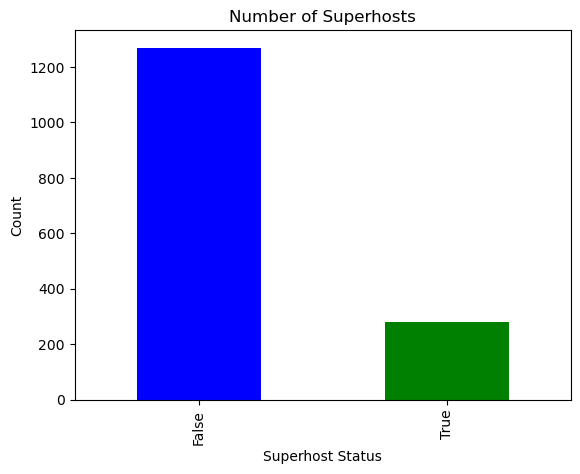

In [20]:
superhost_counts.plot(kind='bar', color=['blue', 'green'])

# Add title and labels
plt.title('Number of Superhosts')
plt.xlabel('Superhost Status')
plt.ylabel('Count')
plt.show()

There are 279 superhosts

6. Is there possible correlation between the distance to the closest metro station and price?

Correlation Coefficient: -0.03942016657108458


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='metro_dist', ylabel='price'>

Text(0.5, 1.0, 'Distance to Metro vs Price')

Text(0.5, 0, 'Distance to Metro Station')

Text(0, 0.5, 'Price (Euros)')

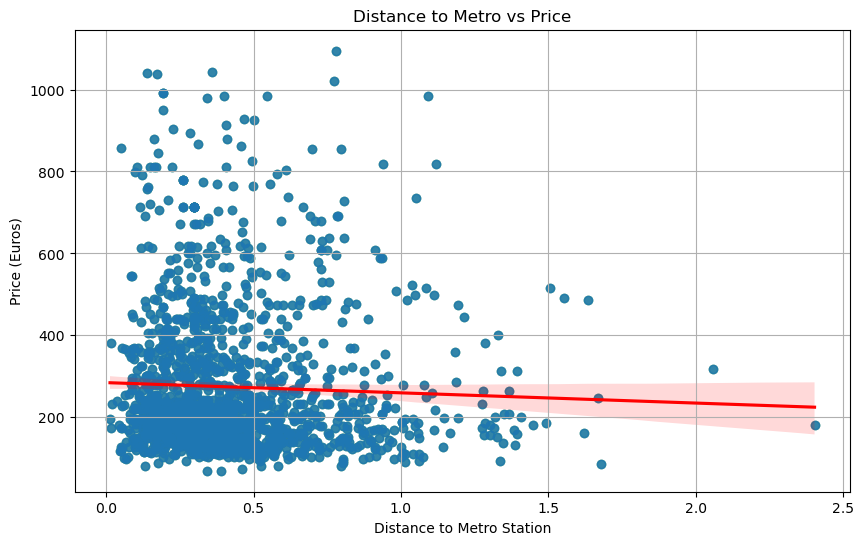

In [21]:
correlation = bc_normal_price['metro_dist'].corr(bc_normal_price['price'])



# Print the correlation coefficient
print("Correlation Coefficient:", correlation)

plt.figure(figsize=(10, 6))
plt.scatter(bc_normal_price['metro_dist'], bc_normal_price['price'], alpha=0.5, color='green')
sn.regplot(x='metro_dist',y='price',data=bc_normal_price,line_kws={'color': 'red'})
plt.title('Distance to Metro vs Price')
plt.xlabel('Distance to Metro Station')
plt.ylabel('Price (Euros)')
plt.grid(True)



A correlation coefficient of -0.0394 suggests a very weak negative correlation between the distance to the closest metro station and the price of properties.

The negative sign indicates that as the distance to the closest metro station increases, the price tends to decrease slightly, but the correlation is very weak.

7. Run a linear regression model with the dataset. 'price' is the target variable and all other features (except longitude and latitude) as predictor variables. Follow the steps we have practiced in class. Display the results.<br>
    Hint: You need to turn True/False Boolean variables (room_private, room_shared, and superhost) into 1/0 before applying statsmodels models. You can use .astype(int). Remember to save the changes by assigning the changed outcome back to the variable, such as <i>car['price'] = car['price']/1000</i>.

In [22]:


# Convert True/False Boolean variables to 1/0
bc_normal_price['room_shared'] = bc_normal_price['room_shared'].astype(int)
bc_normal_price['room_private'] = bc_normal_price['room_private'].astype(int)
bc_normal_price['superhost'] = bc_normal_price['superhost'].astype(int)

# Divide the price by 1000
#normal_price['price'] = normal_price['price'] / 1000

# Define predictor variables (excluding longitude and latitude)
predictors = ['bedrooms', 'room_shared', 'room_private', 'person_capacity', 
              'superhost', 'multi', 'biz', 'cleanliness', 'guest_satisfaction', 
              'dist', 'metro_dist', 'attr_index', 'rest_index']

# Add a constant term to the predictors
X = sm.add_constant(bc_normal_price[predictors])

# Define the target variable
y = bc_normal_price['price']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     266.7
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:01:15   Log-Likelihood:                -9274.5
No. Observations:                1548   AIC:                         1.858e+04
Df Residuals:                    1534   BIC:                         1.865e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 96.4191     35

/var/folders/f6/6y_grg9579bbhr44mb5t2zg80000gp/T/ipykernel_59809/2323125246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_normal_price['room_shared'] = bc_normal_price['room_shared'].astype(int)
/var/folders/f6/6y_grg9579bbhr44mb5t2zg80000gp/T/ipykernel_59809/2323125246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_normal_price['room_private'] = bc_normal_price['room_private'].astype(int)
/var/folders/f6/6y_grg9579bbhr44mb5t2zg80000gp/T/ipykernel_59809/2323125246.py:4: SettingWithCopyWarni

8. Which variables are important to predict the prices? Which are not?

Statistically significant variables: Variables with p-values less than 0.05 are typically considered statistically significant. In this case, 'bedrooms', 'room_shared', 'room_private', 'person_capacity', 'superhost', 'biz', 'guest_satisfaction', 'dist', and 'metro_dist' have p-values less than 0.05, indicating that they are statistically significant predictors of price.

Insignificant variables: 'multi', 'cleanliness', 'attr_index', and 'rest_index' have p-values greater than 0.05, indicating that they are not statistically significant predictors of price. Their coefficients are not reliable for predicting price changes in the model.


Important predictors: The coefficients of statistically significant variables tell us the direction and magnitude of their impact on price. For example, 'bedrooms', 'person_capacity', 'superhost', and 'guest_satisfaction' have positive coefficients, suggesting that an increase in these variables is associated with higher prices. Conversely, 'room_shared', 'room_private', 'dist', and 'metro_dist' have negative coefficients, indicating that an increase in these variables is associated with lower prices.



Based on these results, the important predictors for predicting prices are 'bedrooms', 'room_shared', 'room_private', 'person_capacity', 'superhost', 'biz', 'guest_satisfaction', 'dist', and 'metro_dist'. Conversely, 'multi', 'cleanliness', 'attr_index', and 'rest_index' are not important predictors in this model.


9. Interpret the impact of metro_dist on the price.

The coefficient of 'metro_dist' in the regression results is 23.3560. This indicates that for each unit increase in the distance to the closest metro station (measured in meters), the price of the property is expected to increase by approximately 23.3560 units, holding all other variables constant.

Since the coefficient of 'metro_dist' is positive, it suggests that there is a positive relationship between the distance to the closest metro station and the price of the property. In other words, properties located farther away from the metro station tend to have higher prices, according to the model.

10. Interpret the impact of being a superhost.

The coefficient of 'superhost' in the regression results is 15.5403. This indicates that being a superhost is associated with an increase in the price of the property by approximately 15.5403 units, holding all other variables constant.

Since the coefficient of 'superhost' is positive, it suggests that being a superhost has a positive impact on the price of the property. In other words, properties hosted by superhosts tend to have higher prices compared to properties not hosted by superhosts, according to the model.